In this notebook, we will be looking at a toy dataset and a simple neural network to demonstrate the advantage of the neural networks over linear classifiers. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The following utility functions are for creating random data and plotting. 

In [2]:
def create_data():
  x_1 = np.random.randn(100,2) * 0.1 + 0.5
  x_2 = np.random.randn(100,2) * 0.1 + np.array([0.5,-0.5])
  x_4 = np.random.randn(100,2) * 0.1 + np.array([-0.5,0.5])
  x_3 = np.random.randn(100,2) * 0.1 - 0.5
  x = np.concatenate((x_1, x_2, x_3, x_4))
  
  y_1 = np.ones(100)
  y_2 = np.ones(100) * 0
  y_4 = np.ones(100) * 0
  y_3 = np.ones(100)
  y = np.concatenate((y_1,y_2,y_3, y_4))
  y = y.reshape((-1,1))
  
  return x, y

In [3]:
def plot_data(x, y):

  plt.plot(x[y[:,0] == 1,0], x[y[:,0]==1,1], 'bx')
  plt.plot(x[y[:,0]==0,0], x[y[:,0]==0,1], 'ro')

def plot_line(c_1, c_2, c):
  # c_1*x + c_2*y + c = 0 

  plt.ylim(-1.2,1.2)
  plt.xlim(-1.2,1.2)
  x = np.linspace(-2,2,100)
  y = (-c_1*x-c)/c_2
  
  plt.plot(x, y)

def plot_lines(W, b):
  for col, c in zip(W.T, b):
    plot_line(col[0], col[1], c)

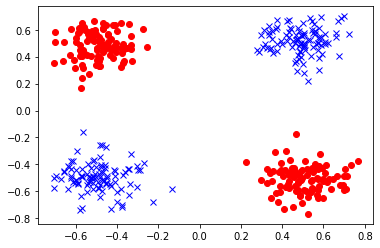

In [4]:
x_train, y_train = create_data()
plot_data(x_train,y_train)

There are two classes in the data. In the above plot, blue points correspond to the positive class (label 1) and the red points correspond to the negative class (label 0). As you can see from the plot, this data is not linearly separable. In a 2-d input space, this means there is no line that separates the two classes.

Now we will train a neural network on this data and visualize the features learned by the network. 

In [5]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [6]:
tf.keras.backend.clear_session()

In [7]:
tf.random.set_seed(10)
inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(2, activation=tf.nn.tanh)(inputs)
outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


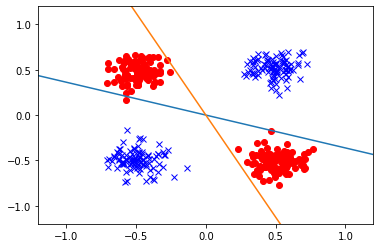

In [8]:
plot_data(x_train ,y_train)
b = model.weights[1].numpy()
w = model.weights[0].numpy()
plot_lines(w,b)

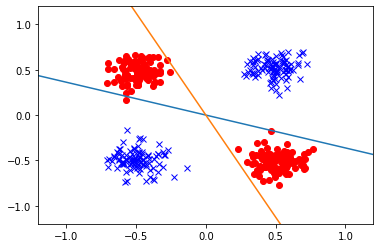

In [9]:
plot_data(x_train ,y_train)
b = model.weights[1].numpy().reshape((1,-1))
w = model.weights[0].numpy()
plot_line(w[0,0], w[1,0], b[0,0])    
plot_line(w[0,1], w[1,1], b[0,1]) 

In [10]:
model.fit(x_train, y_train, batch_size = 16, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4925
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.4625
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.4175
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.3750
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.3475
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.3275
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.2675
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.2525
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.2525
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.2525
Epoch 11/

In [15]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 1.0000


[0.29884061217308044, 1.0]

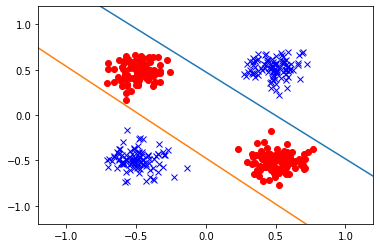

In [11]:
plot_data(x_train ,y_train)
b = model.weights[1].numpy()
w = model.weights[0].numpy()
plot_lines(w,b)

In [12]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[2.5032594, 2.3557975],
        [2.6110826, 2.3272576]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-1.2423972,  1.1055657], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.5820194],
        [-1.5744258]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([1.0234632], dtype=float32)>]

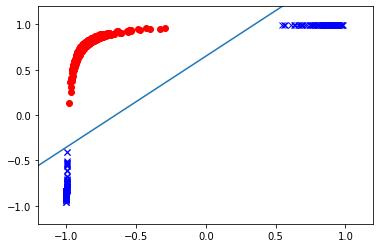

In [14]:
activations = model.get_layer(name='dense')(x_train)
plot_data(activations.numpy(), y_train)
b = model.weights[3].numpy().reshape((1,-1))
w = model.weights[2].numpy()
plot_line(w[0,0], w[1,0], b[0,0]) 

Note that in this new feature space our data becomes linearly separable and the line defined by the output layer separates the two classes. The blue points has both a₁ and a₂ coordinates positive because those points in the (x₁, x₂) space are on the positive side of both lines defined by the hidden layer parameters and after applying tanh both coordinates are positive. For the red points one of a₁ and a₂ is positive because in the (x₁, x₂)-space the red points are on the positive side of only one of the lines defined by the hidden layer parameters and depending on this line they have only one of their coordinates in the new feature space positive and the other is negative. This explains the data plot in (a₁,a₂)-space above.

**Conclusion**: Neural networks learn a new representation of the data which makes it easy to classify with respect to this new representation.